<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/Aprendizaje-Supervisado/KnnDigitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
import numpy as np
import pandas as pd

In [3]:
digitos=datasets.load_digits()

In [4]:
digitos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
print(digitos.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [6]:
digitos.data.shape

(1797, 64)

In [7]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
import matplotlib.pyplot as plt

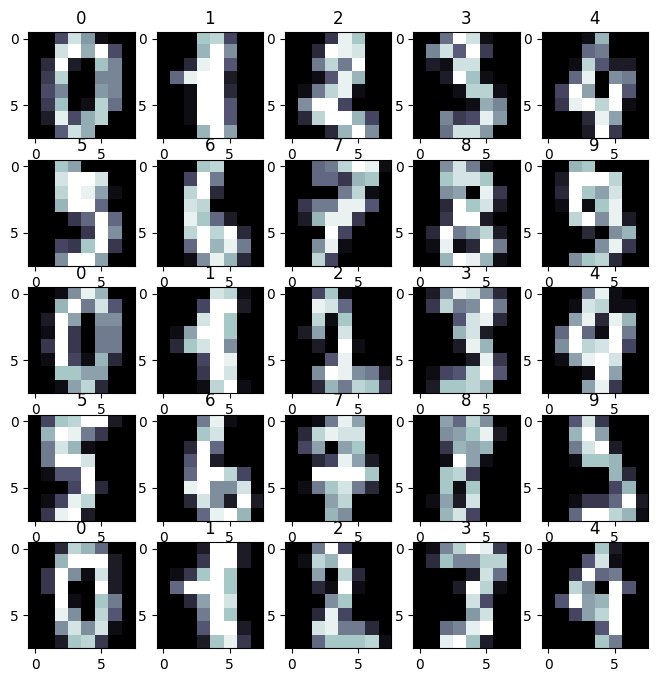

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(digitos.data[i].reshape(8, 8), cmap='bone')
    ax.set_title(digitos.target[i])


<Figure size 640x480 with 0 Axes>

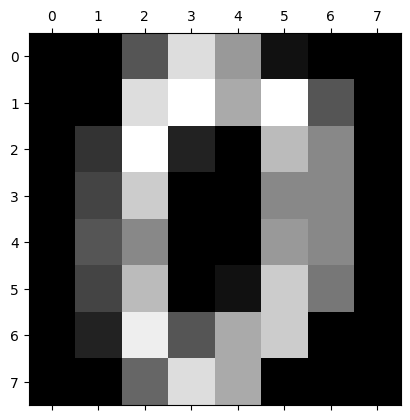

In [10]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digitos.images[0])
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(digitos.data, digitos.target, test_size=0.25, random_state=42, stratify=digitos.target)

In [13]:
x_train.shape

(1347, 64)

In [14]:
y_train.shape

(1347,)

In [15]:
#se llama al KNN
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#X=digitos.data
#y=digitos.target
X=x_train.data
y=y_train

In [17]:
#declaro el modelo
knn=KNeighborsClassifier(n_neighbors=7)

In [18]:
#entreno
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=7)

In [19]:
#para predecir el modelo
y_predTest=knn.predict(x_test)
#predicción probabilística
#y_predTest=knn.predict_proba(x_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
mx=confusion_matrix(y_test, y_predTest)
mx

array([[44,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 44,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  2,  0,  1,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 43]])

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

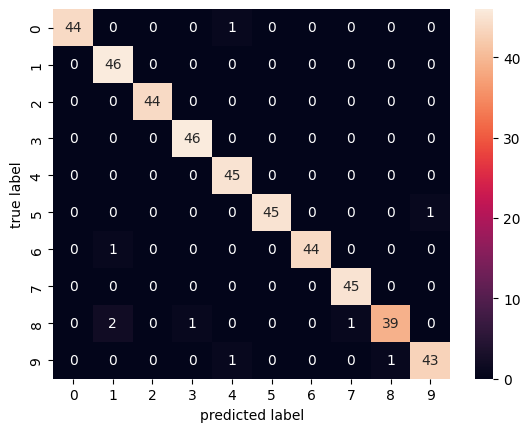

In [23]:
sns.heatmap(mx, annot=True, fmt='d',)
plt.ylabel('true label')
plt.xlabel('predicted label');
plt.show()

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, y_predTest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.94      1.00      0.97        46
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        46
           4       0.96      1.00      0.98        45
           5       1.00      0.98      0.99        46
           6       1.00      0.98      0.99        45
           7       0.98      1.00      0.99        45
           8       0.97      0.91      0.94        43
           9       0.98      0.96      0.97        45

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [26]:
#se utiliza la Curva ROC
from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt